In [1]:
# Importation

import mne
import os
import scipy.stats
import pickle
import matplotlib
import numpy as np
from src.utils import get_bids_file, compute_ch_adjacency
from src.params import BIDS_PATH, PREPROC_PATH, SUBJ_CLEAN, ACTIVE_RUN, PASSIVE_RUN, RESULT_PATH, EVENTS_ID, FIG_PATH, FREQS_LIST, FREQS_NAMES
from mne.stats import spatio_temporal_cluster_test, combine_adjacency, spatio_temporal_cluster_1samp_test
from matplotlib.backends.backend_pdf import PdfPages 

import numpy as np
from matplotlib import pyplot as plt

from mne import create_info, Epochs
from mne.baseline import rescale
from mne.io import RawArray
from mne.time_frequency import (
    tfr_multitaper,
    tfr_stockwell,
    tfr_morlet,
    tfr_array_morlet,
    AverageTFR,
)
from mne.viz import centers_to_edges

In [4]:
_, path_epochs = get_bids_file(RESULT_PATH, task='LaughterActive', subj='01', stage="AR_epo")
epochs = mne.read_epochs(path_epochs, verbose=None)
epochs.get_data().shape

Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated


(296, 270, 2401)

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


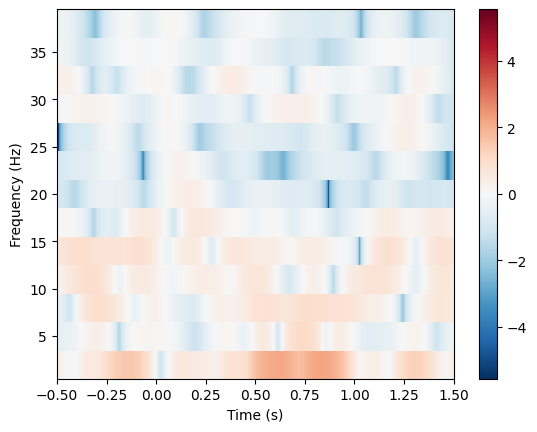

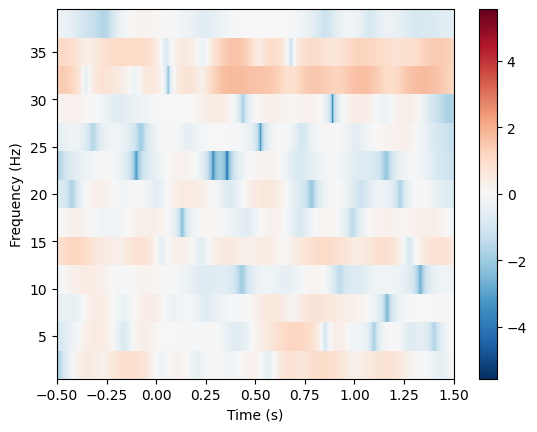

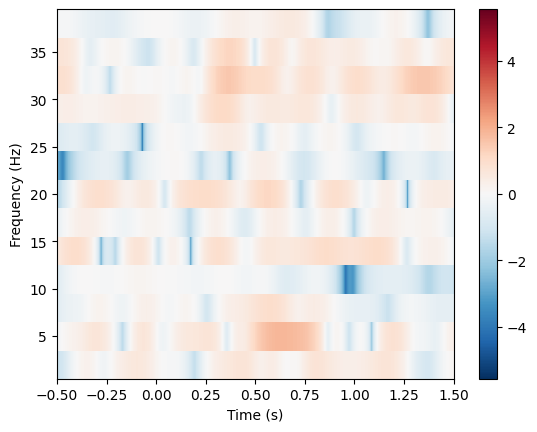

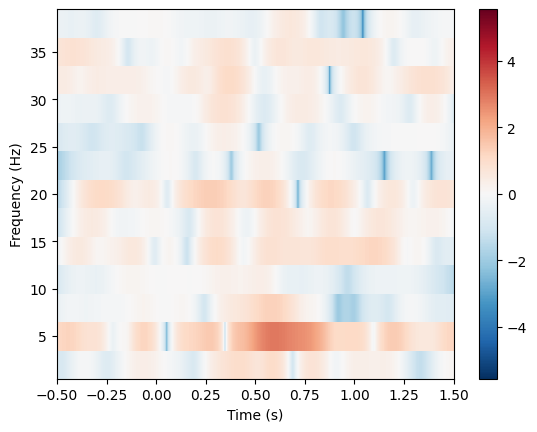

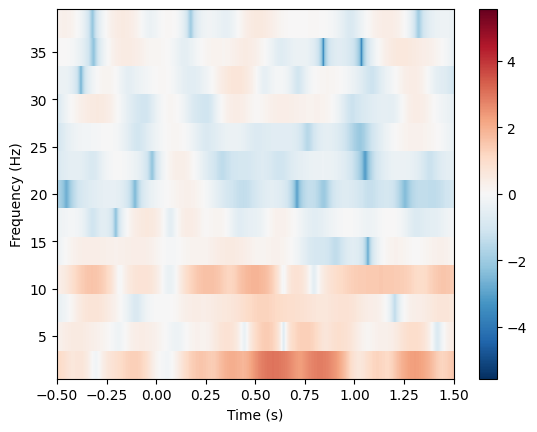

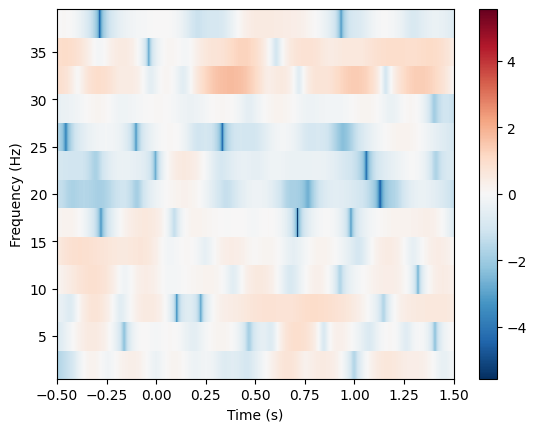

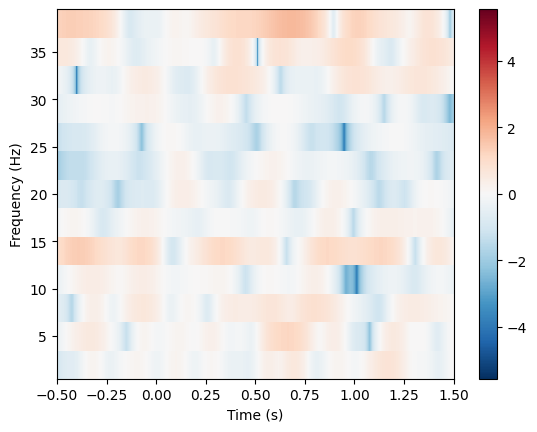

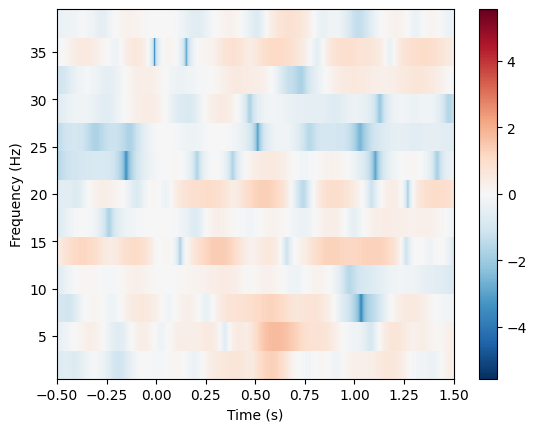

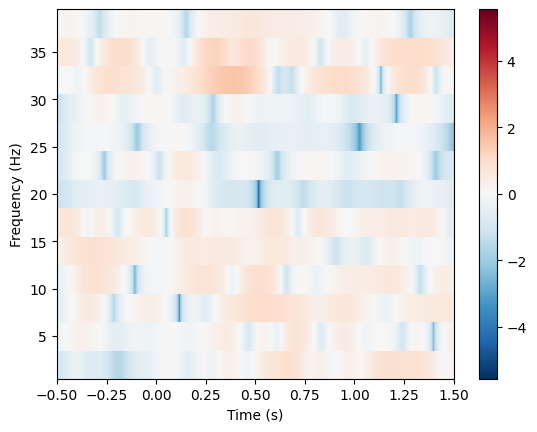

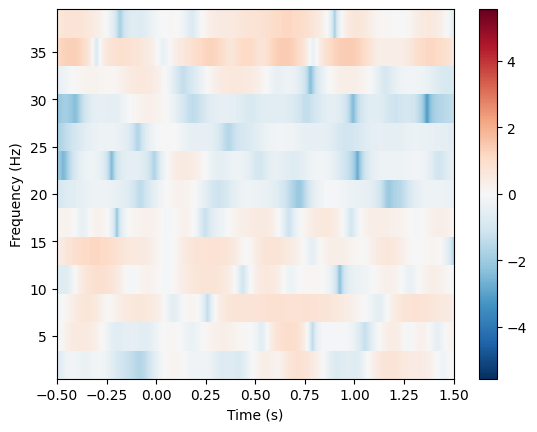

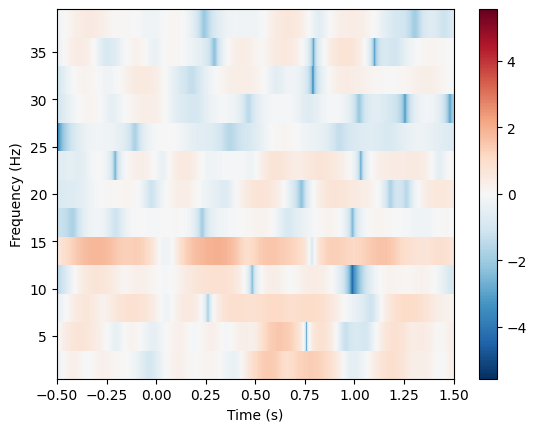

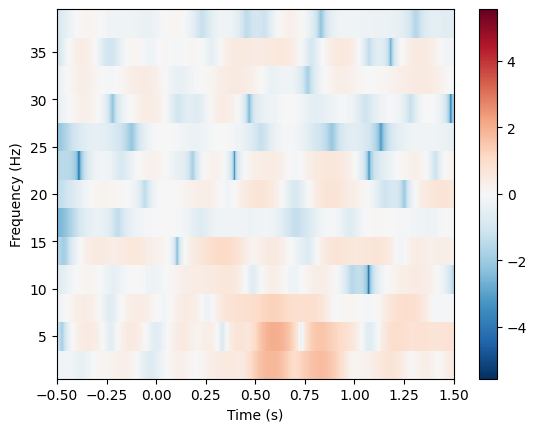

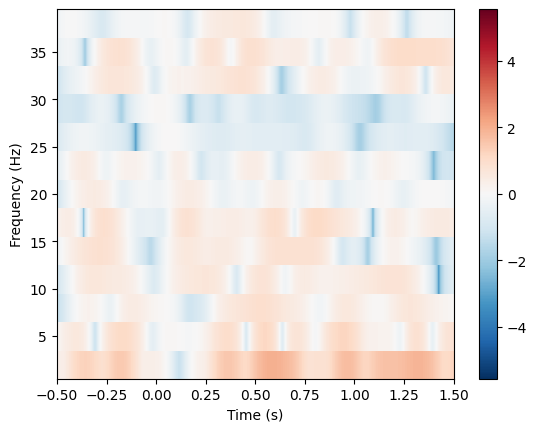

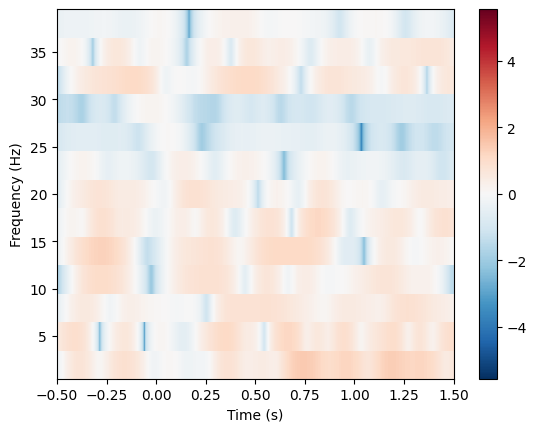

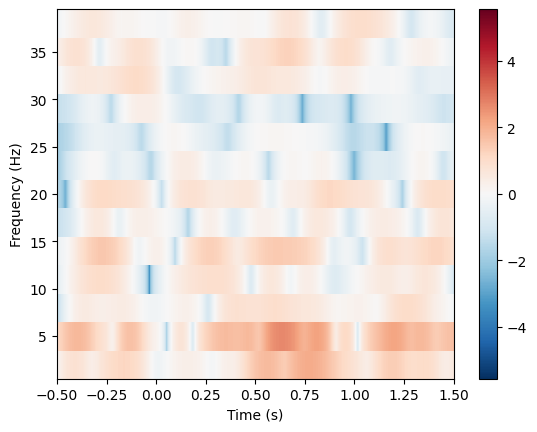

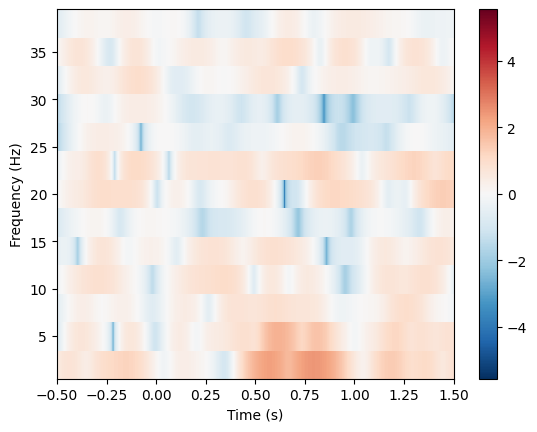

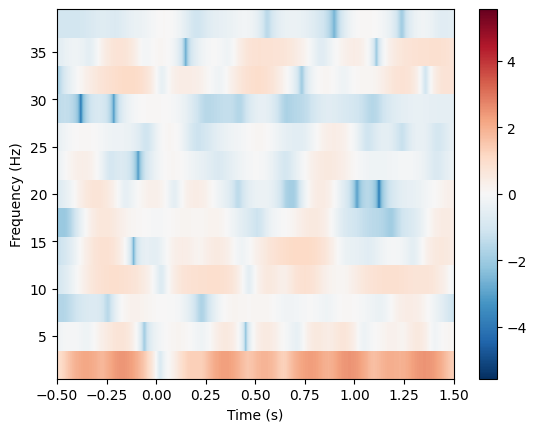

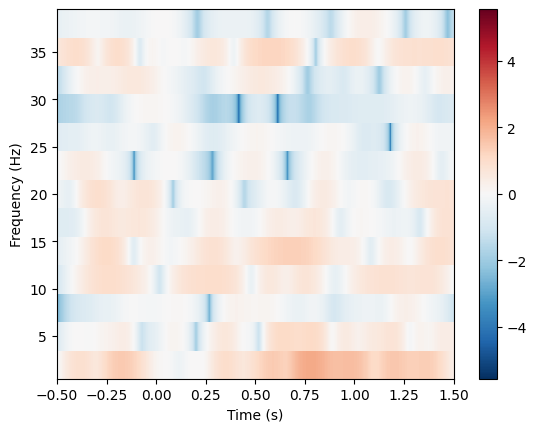

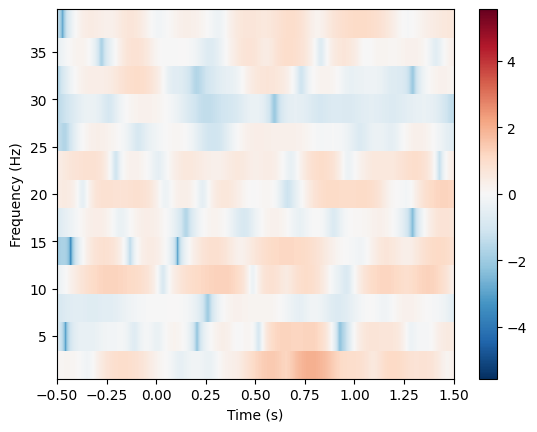

avg power channel  (1, 13, 2401)
Applying baseline correction (mode: logratio)


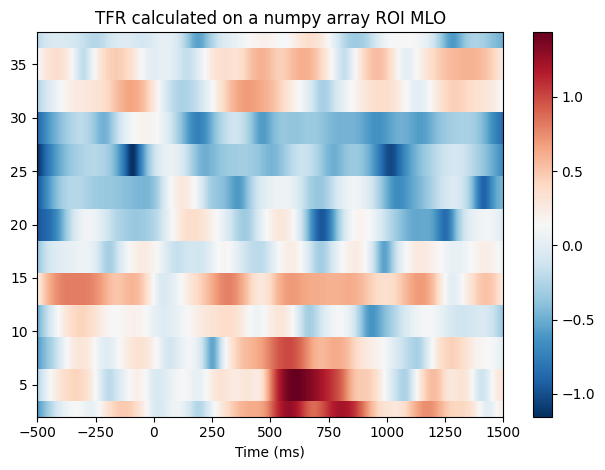

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


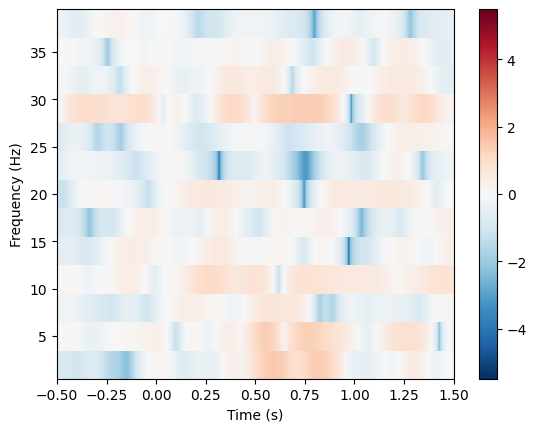

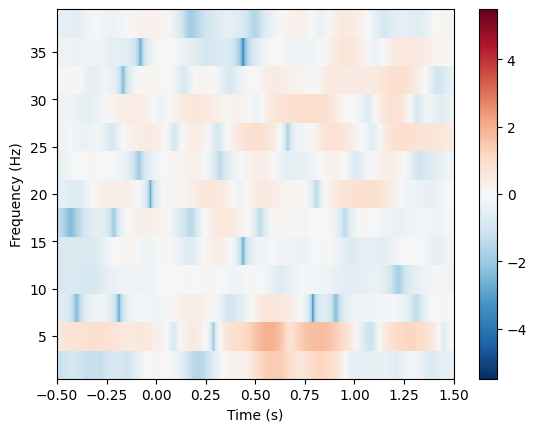

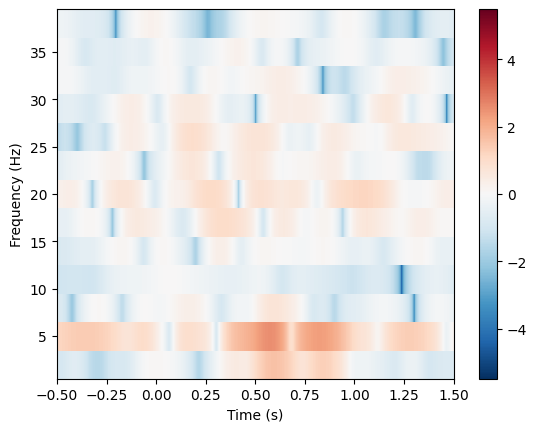

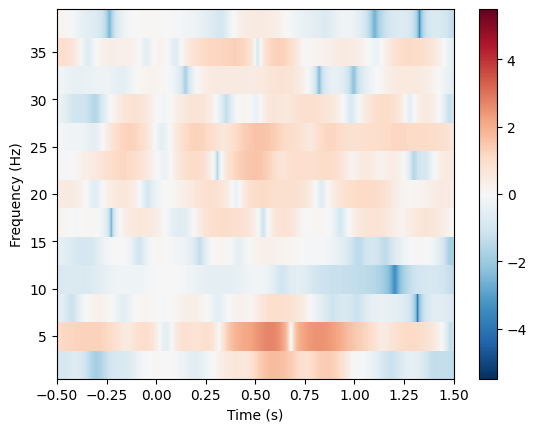

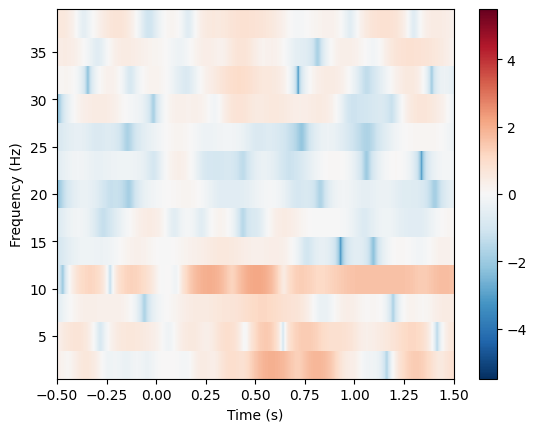

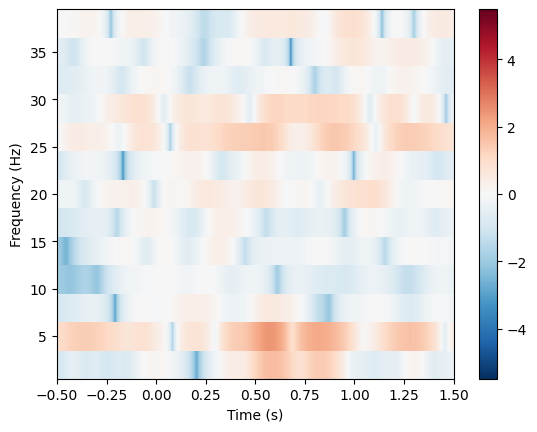

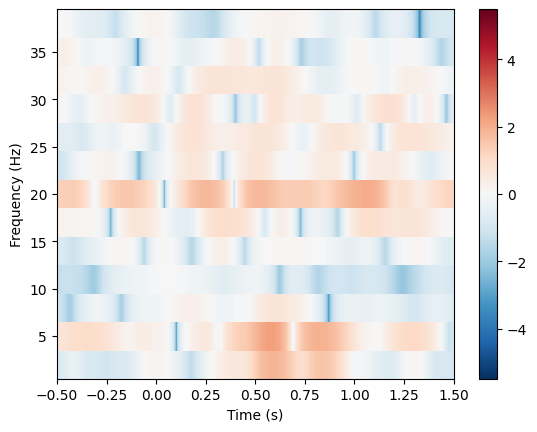

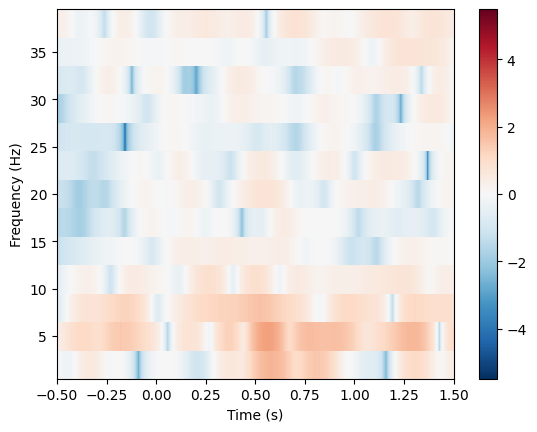

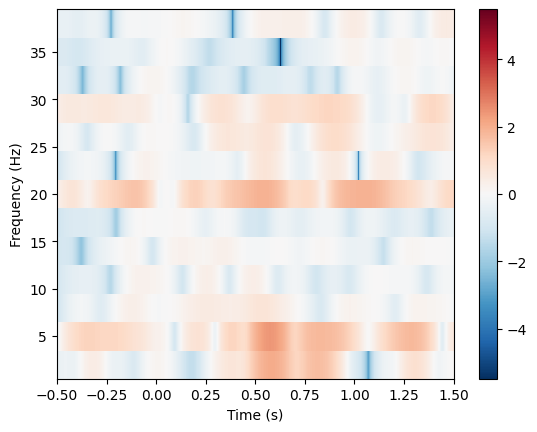

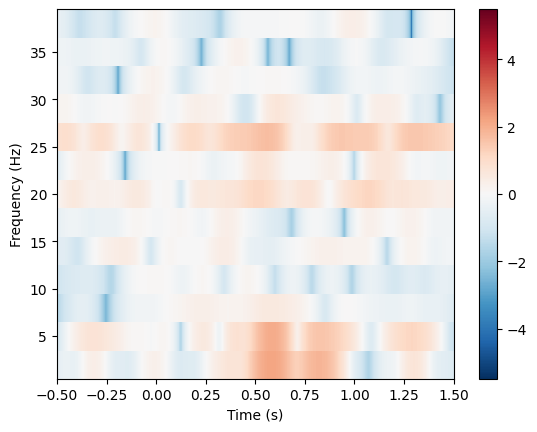

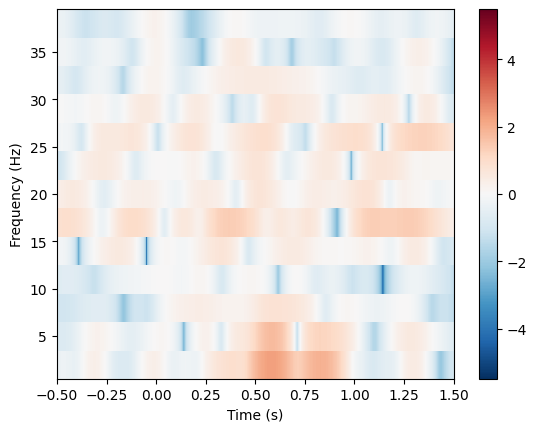

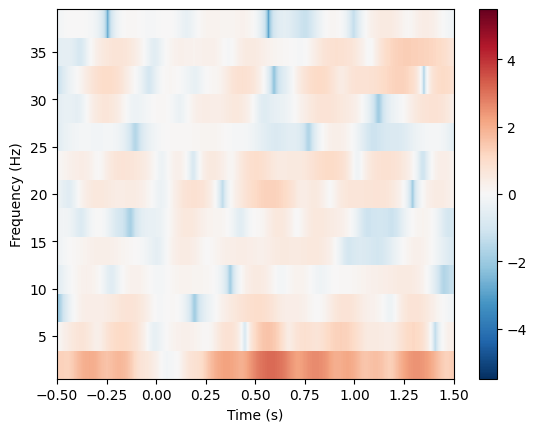

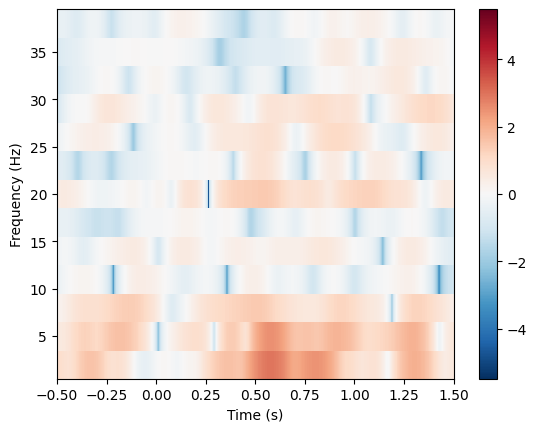

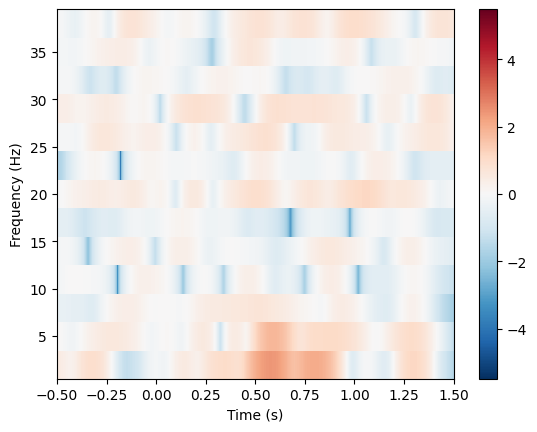

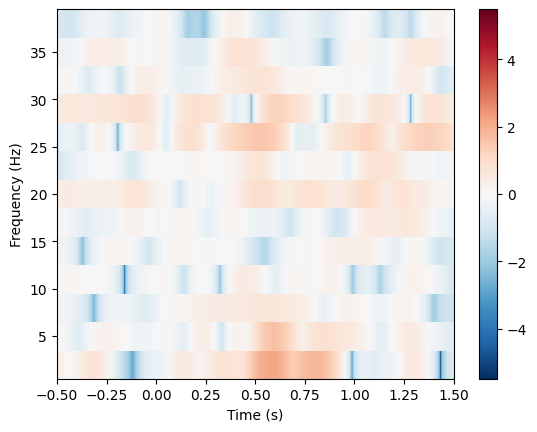

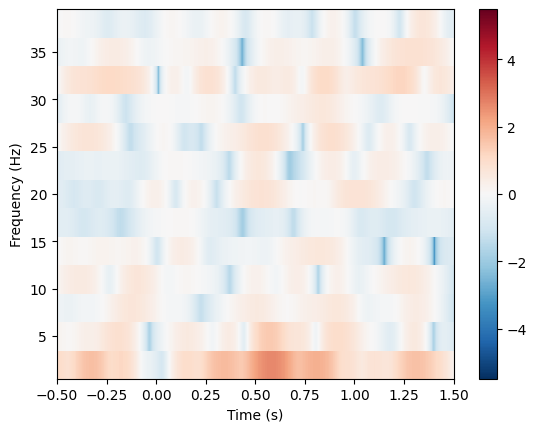

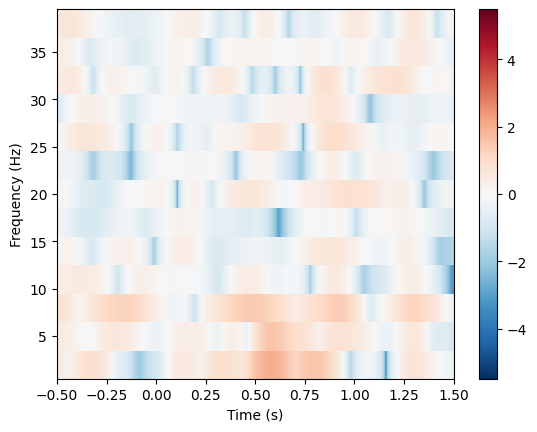

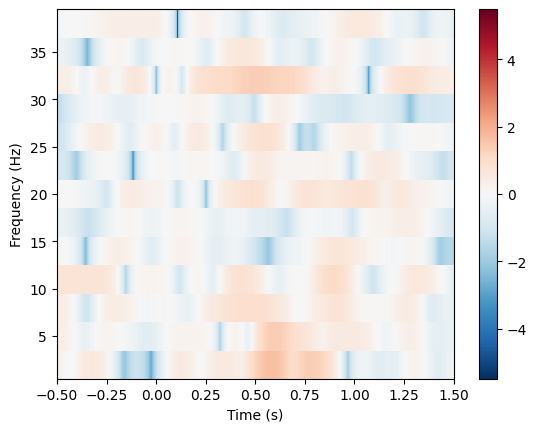

avg power channel  (1, 13, 2401)
Applying baseline correction (mode: logratio)


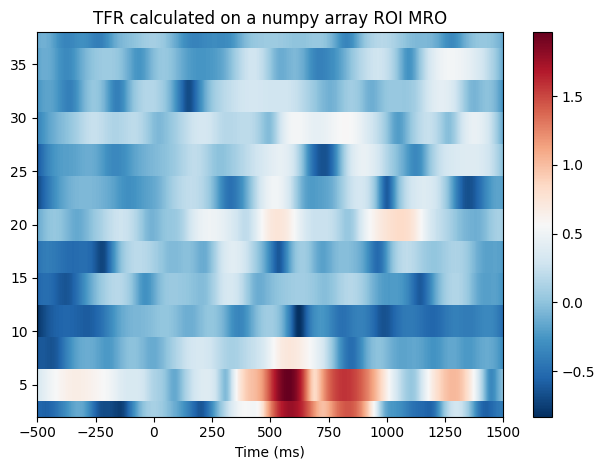

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
1st power (1, 21, 13, 2401)
avg power  (21, 13, 2401)
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished
/home/claraelk/notebook/lib/python3.8/site-packages/mne/time_frequency/tfr.py:1499: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figs = [plt.figure() for i in range(n_picks)]


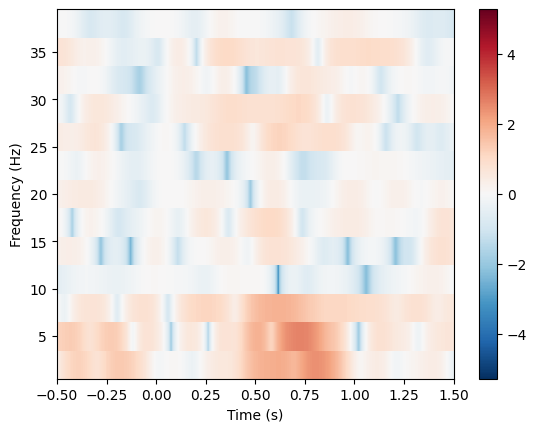

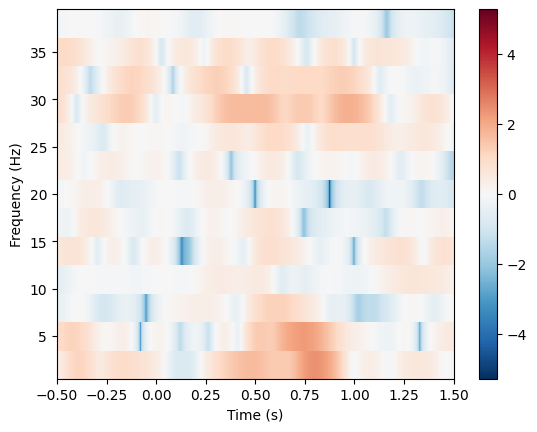

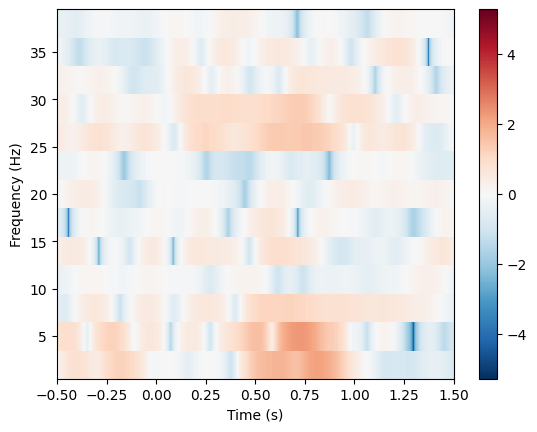

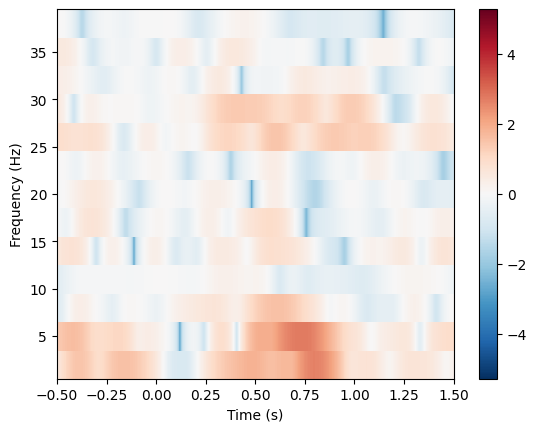

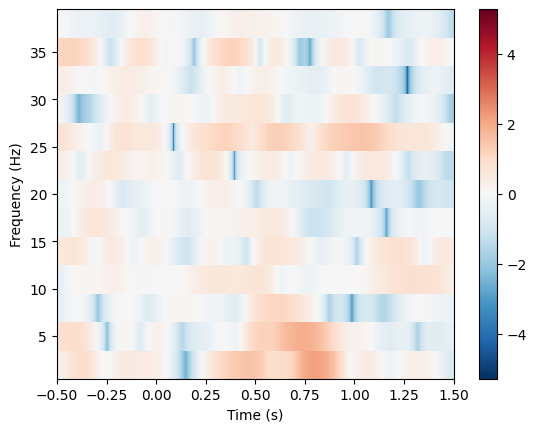

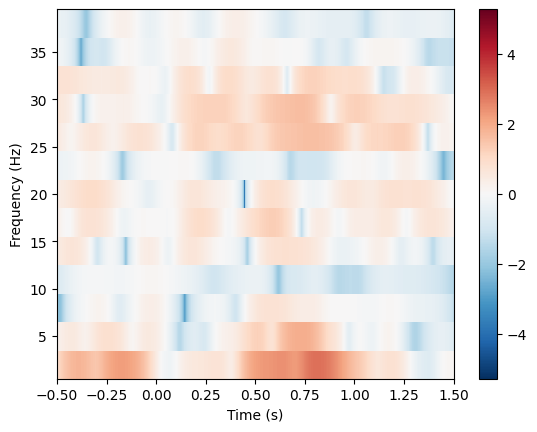

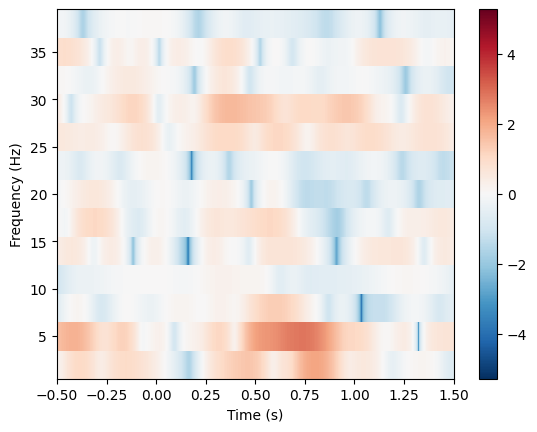

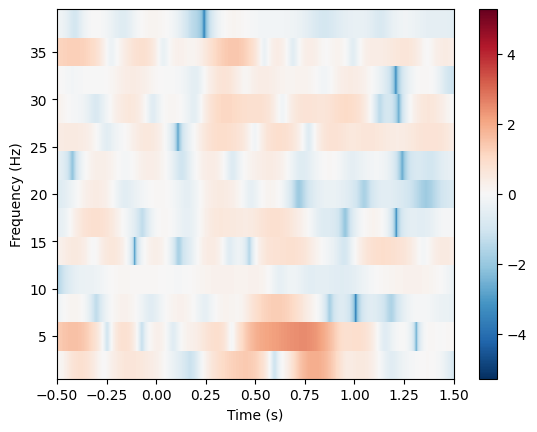

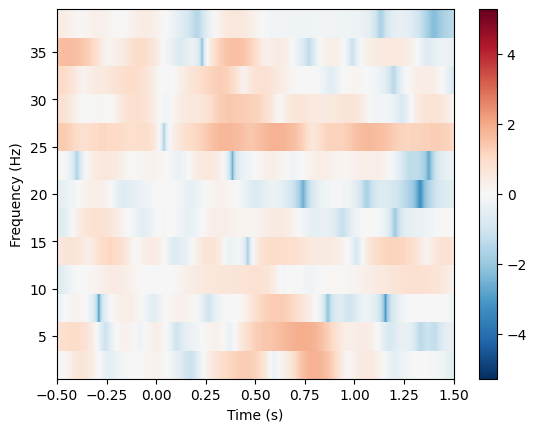

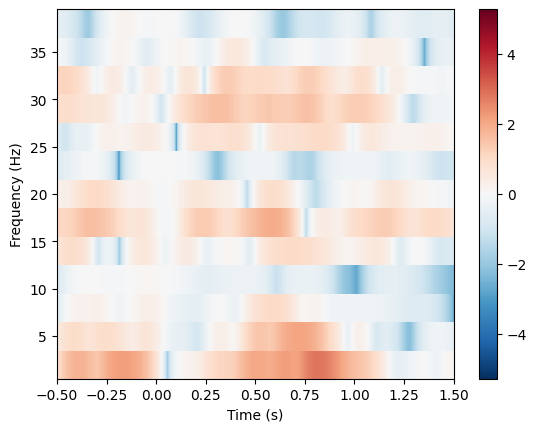

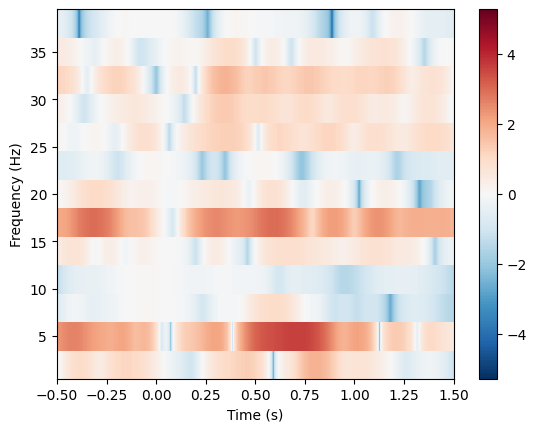

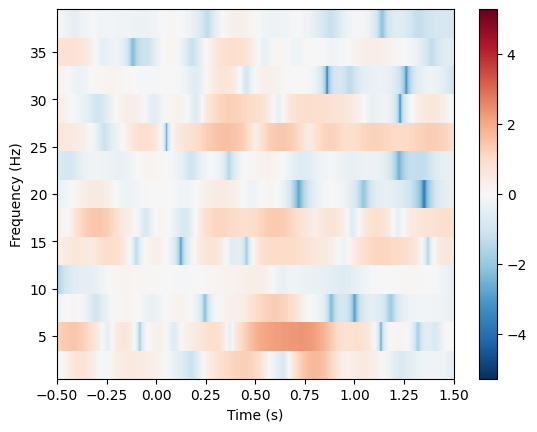

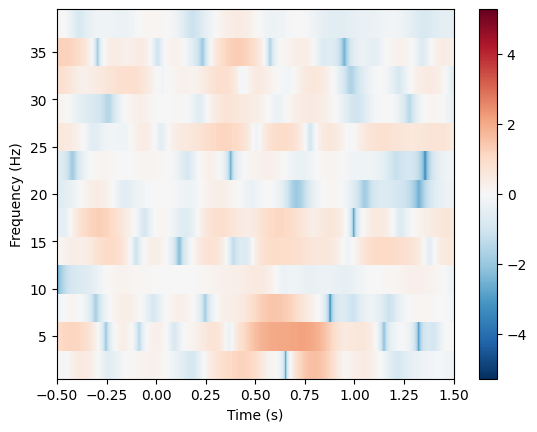

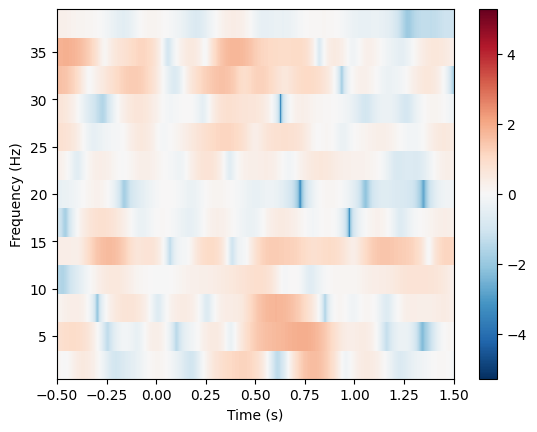

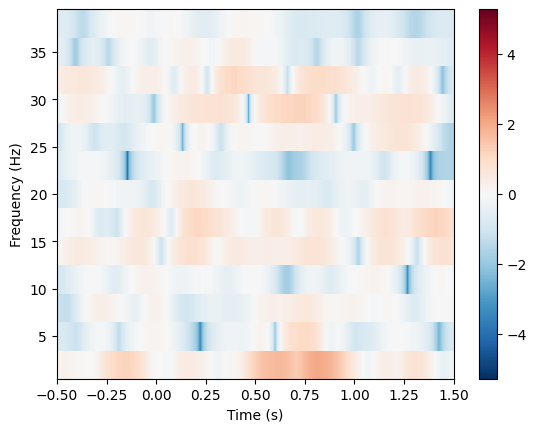

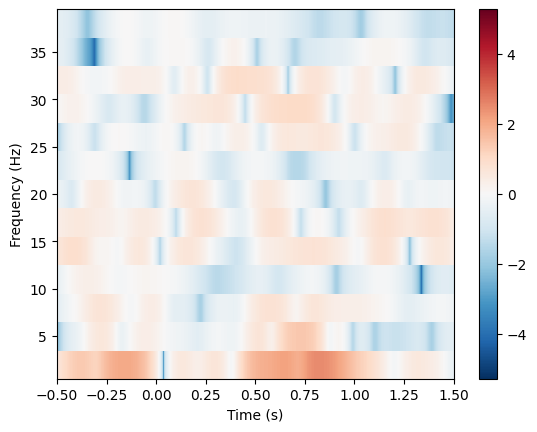

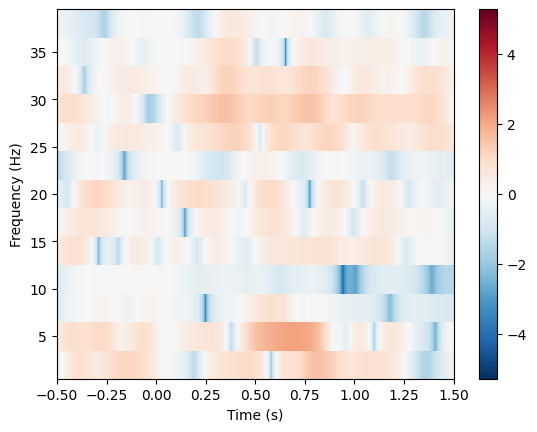

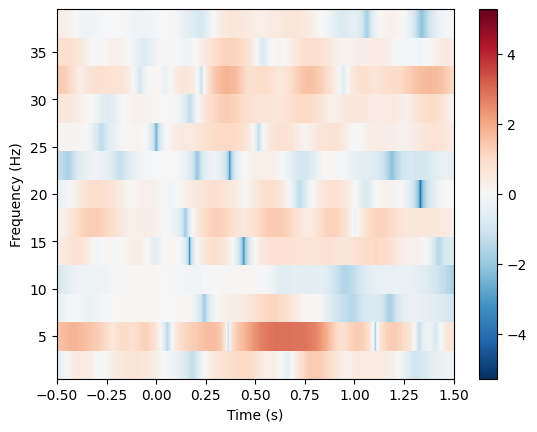

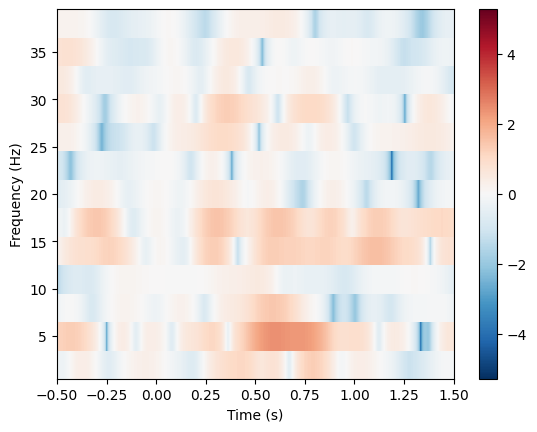

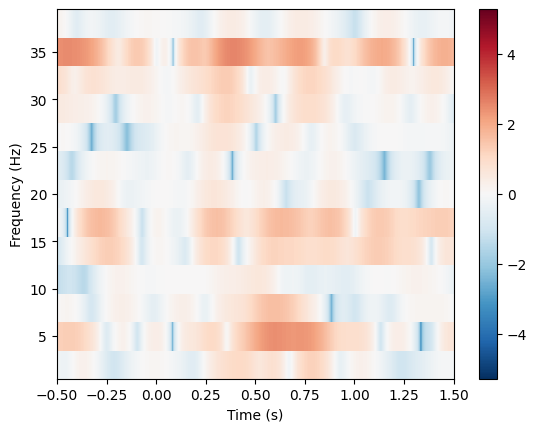

KeyboardInterrupt: 

In [2]:
# TFR Morlet
ROIS = ['MLO', 'MRO',
       'MLP', 'MRP',
       'MLT', 'MRT',
       'MLC', 'MRC',
       'MLF', 'MRF',
       'MZ']

task = 'LaughterActive'
cond = 'LaughReal'
freqs = np.arange(2.0, 40.0, 3.0)
vmin, vmax = -1.0, 1.0 

for roi in ROIS : 
    
    all_evokeds = []

    for subj in SUBJ_CLEAN :
        
        chan_selected = []

        print("processing -->", subj)

        _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
        epochs = mne.read_epochs(path_epochs, verbose=None)
        
        if subj == SUBJ_CLEAN[0]:
            head_info = epochs.info['dev_head_t']
        else:
            epochs.info['dev_head_t'] = head_info
            
        all_evokeds.append(epochs[cond].average())
        
    evokeds_all_subj = mne.combine_evoked(all_evokeds, weights='equal') # TODO SAVE THIS TO USE LOCAL
    
    for chan in epochs.info['ch_names'] :
        if roi in chan : 
            chan_selected.append(chan) # Find channel of interest        
    
    n_cycles = freqs/2
    
    print(len(chan_selected))
    print(evokeds_all_subj.data.shape)
    
    ######## COMPUTE TF ON EVOKEDS
    ######## 1. compute morlet on every channel separately
    power = tfr_morlet(
    evokeds_all_subj, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False, picks=chan_selected
    )

    ######## 2. Average Trials
    print('1st power', power.data.shape)
    avgpower = power.average()
    print('avg power ', avgpower.data.shape)
    
    # Plot average trial for every channel
    avgpower.plot(baseline=(0.0, 0.1), mode="logratio")
    plt.show()
    
    ######## 3. Average Channel
    avgpower_chan = np.mean(avgpower.data, axis=0)
    avgpower_chan = np.reshape(avgpower_chan, (1, avgpower_chan.shape[0], avgpower_chan.shape[1]))
    print('avg power channel ', avgpower_chan.shape)
    
    # Plot Average channel
    title_fig2 = "TFR calculated on a numpy array ROI " + roi
    # Baseline the output
    rescale(avgpower_chan, epochs.times, (0.0, 0.1), mode="logratio", copy=False)
    fig, ax = plt.subplots()
    x, y = centers_to_edges(epochs.times * 1000, freqs)
    mesh = ax.pcolormesh(x, y, avgpower_chan[0], cmap="RdBu_r") #, vmin=vmin, vmax=vmax)
    ax.set_title(title_fig2)
    ax.set(ylim=freqs[[0, -1]], xlabel="Time (ms)")
    fig.colorbar(mesh)
    plt.tight_layout()

    plt.show()

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  6.8min finished


Adding metadata with 7 columns
1st power (1979, 19, 13, 2401)
avg power  (19, 13, 2401)
Applying baseline correction (mode: mean)


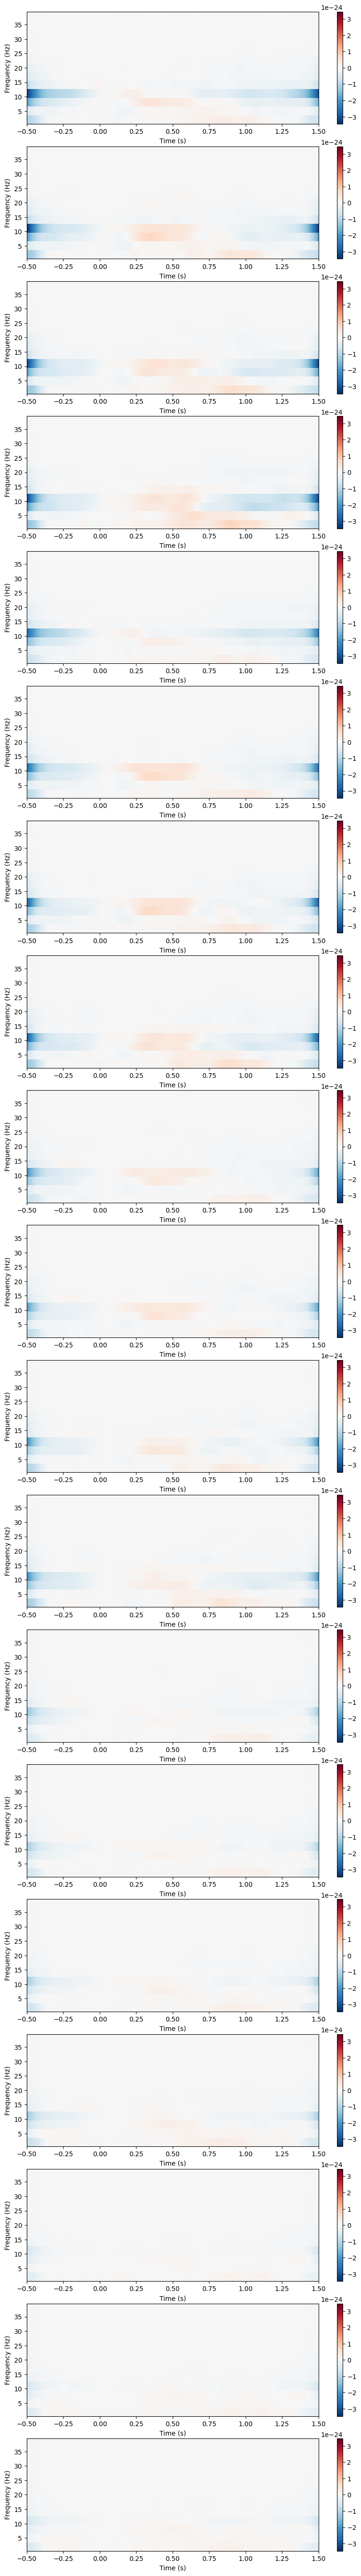

avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


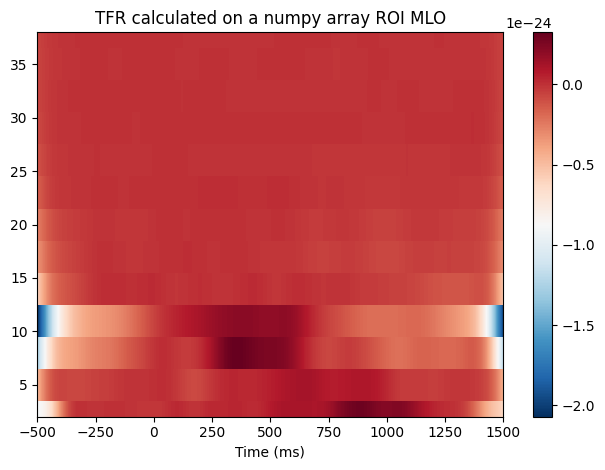

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


KeyboardInterrupt: 

In [2]:
ROIS = ['MLO', 'MRO',
       'MLP', 'MRP',
       'MLT', 'MRT',
       'MLC', 'MRC',
       'MLF', 'MRF',
       'MZ']

task = 'LaughterActive'
cond = 'LaughReal'
freqs = np.arange(2.0, 40.0, 3.0)
vmin, vmax = -0.6, 0.6 

filename = 'tf/sub-all_task-{}_run-all_cond-{}_meas-time-frequency_map.pdf'.format(task, cond)
pdf = PdfPages(FIG_PATH + filename)

for roi in ROIS : 
    
    all_epochs = []

    for subj in SUBJ_CLEAN :
        
        chan_selected = []

        print("processing -->", subj)

        _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
        epochs = mne.read_epochs(path_epochs, verbose=None)
        
        if subj == SUBJ_CLEAN[0]:
            head_info = epochs.info['dev_head_t']
        else:
            epochs.info['dev_head_t'] = head_info
            
        all_epochs.append(epochs[cond])
        
    epochs_all_subj = mne.concatenate_epochs(all_epochs) # TODO SAVE THIS TO USE LOCAL
    
    for chan in epochs.info['ch_names'] :
        if roi in chan : 
            chan_selected.append(chan) # Find channel of interest        
    
    n_cycles = freqs/2
    
    print(len(chan_selected))
    print(epochs_all_subj.get_data().shape)
   
    ######## COMPUTE TF ON EPOCHS
    ######## 1. compute morlet on every channel separately
    power = tfr_morlet(
    epochs_all_subj, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False, picks=chan_selected
    )
    
    fig, ax = plt.subplots(len(chan_selected), figsize=(10,70))
    ######## 2. Average Trials
    print('1st power', power.data.shape)
    avgpower = power.average()
    print('avg power ', avgpower.data.shape)
    
    # Plot average trial for every channel
    avgpower.plot(baseline=(0.0, 0.1), mode="mean", axes=ax)
    fig.suptitle('All channels ROI ' + roi)
    
    #plt.savefig(pdf, format='pdf') 
    plt.show()
    
    ######## 3. Average Channel
    avgpower_chan = np.mean(avgpower.data, axis=0)
    avgpower_chan = np.reshape(avgpower_chan, (1, avgpower_chan.shape[0], avgpower_chan.shape[1]))
    print('avg power channel ', avgpower_chan.shape)
    
    # Plot Average channel
    title_fig2 = "TFR calculated on a numpy array ROI " + roi
    # Baseline the output
    rescale(avgpower_chan, epochs.times, (0.0, 0.1), mode="mean", copy=False)
    fig, ax = plt.subplots()
    x, y = centers_to_edges(epochs.times * 1000, freqs)
    mesh = ax.pcolormesh(x, y, avgpower_chan[0], cmap="RdBu_r") #, vmin=vmin, vmax=vmax)
    ax.set_title(title_fig2)
    ax.set(ylim=freqs[[0, -1]], xlabel="Time (ms)")
    fig.colorbar(mesh)
    plt.tight_layout()
    
    #plt.savefig(pdf, format='pdf') 
    plt.show()

pdf.close()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.9s finished


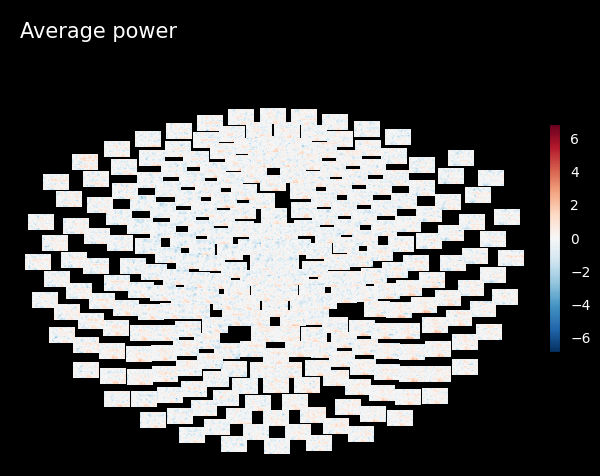

Applying baseline correction (mode: logratio)


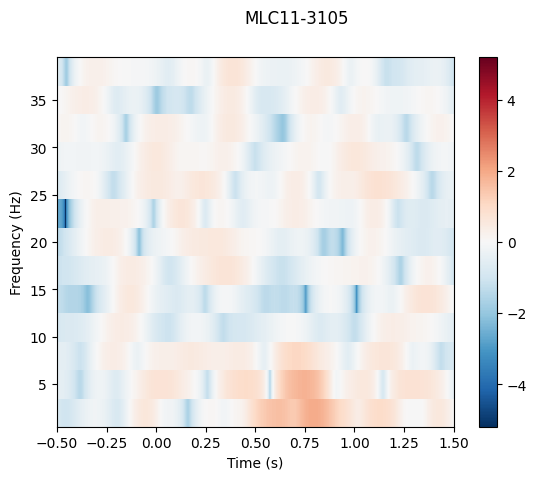

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


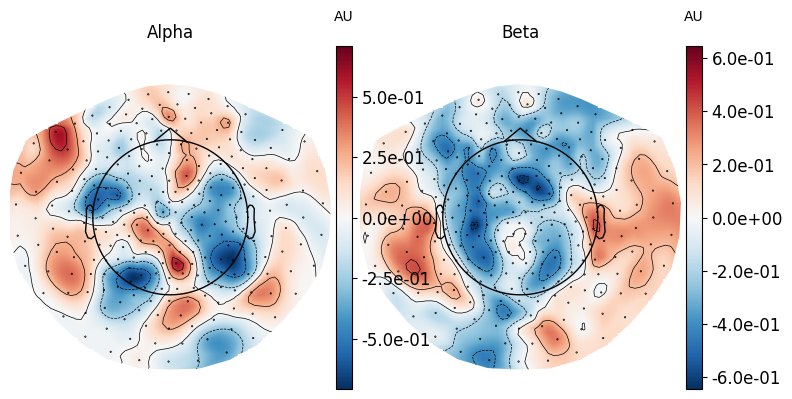

In [22]:
power = tfr_morlet(
    evokeds_all_subj, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False
)

avgpower = power.average()
avgpower.plot_topo(baseline=(-0.5, 0), mode="logratio", title="Average power")
avgpower.plot([0], baseline=(-0.5, 0), mode="logratio", title=power.ch_names[0])

fig, axes = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)
topomap_kw = dict(
    ch_type="mag", tmin=0.5, tmax=1.5, baseline=(-0.5, 0), mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    avgpower.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

## Comparison between 2 conditions

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  7.0min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  7.0min finished


Adding metadata with 7 columns
1st power (1979, 19, 13, 2401)
avg power  (19, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


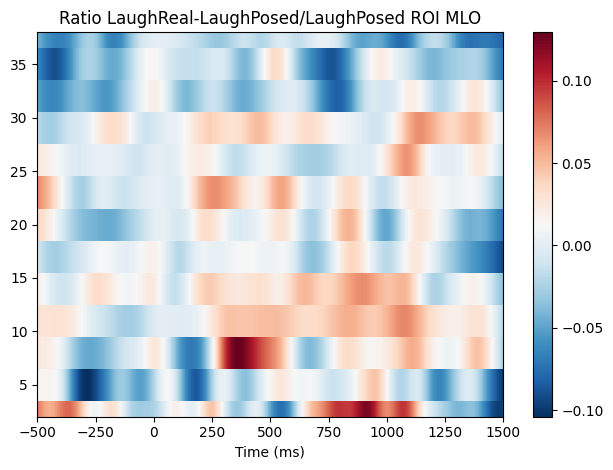

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.6min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.6min finished


Adding metadata with 7 columns
1st power (1979, 18, 13, 2401)
avg power  (18, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


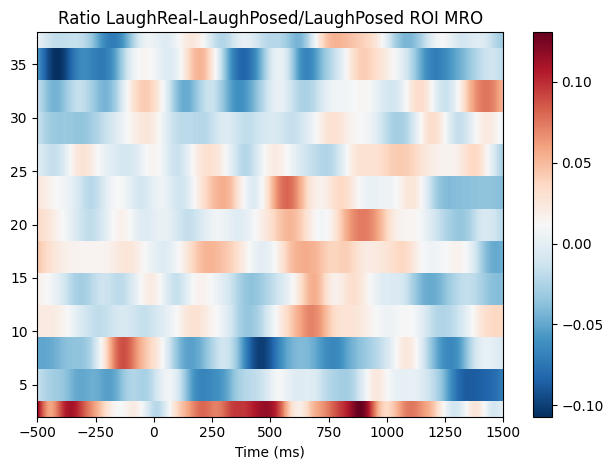

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  7.7min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  7.7min finished


Adding metadata with 7 columns
1st power (1979, 21, 13, 2401)
avg power  (21, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


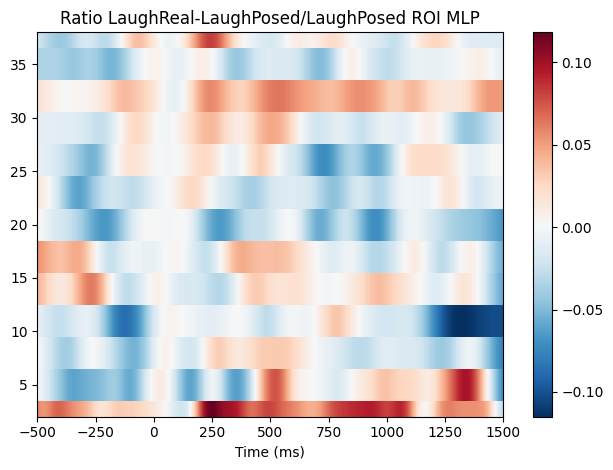

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  7.7min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  7.7min finished


Adding metadata with 7 columns
1st power (1979, 21, 13, 2401)
avg power  (21, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


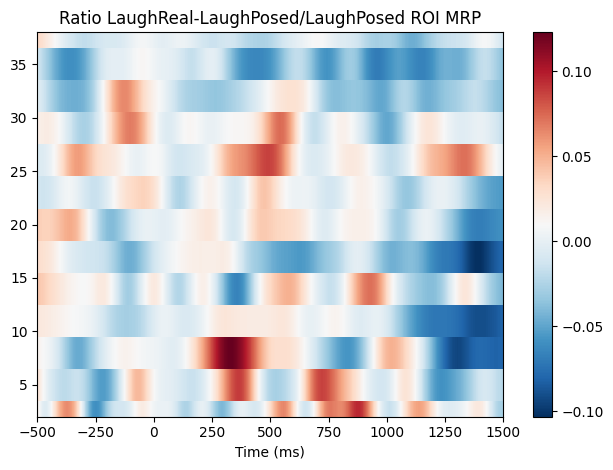

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 12.5min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 12.4min finished


Adding metadata with 7 columns
1st power (1979, 34, 13, 2401)
avg power  (34, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


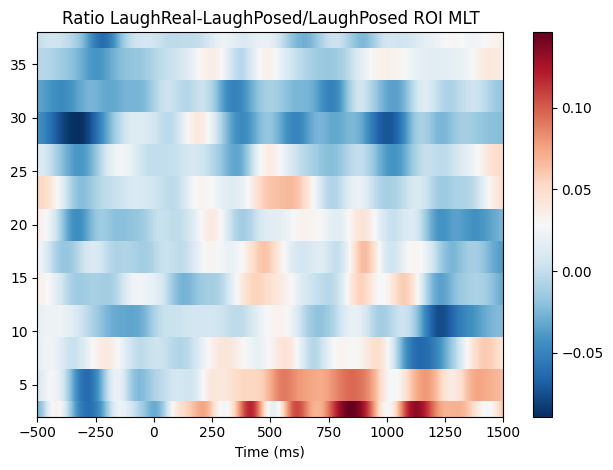

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   60.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 11.1min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 11.1min finished


Adding metadata with 7 columns
1st power (1979, 33, 13, 2401)
avg power  (33, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


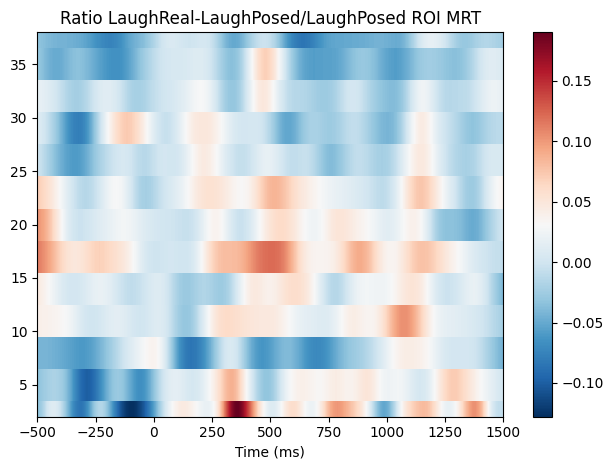

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  8.7min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  8.0min finished


Adding metadata with 7 columns
1st power (1979, 24, 13, 2401)
avg power  (24, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


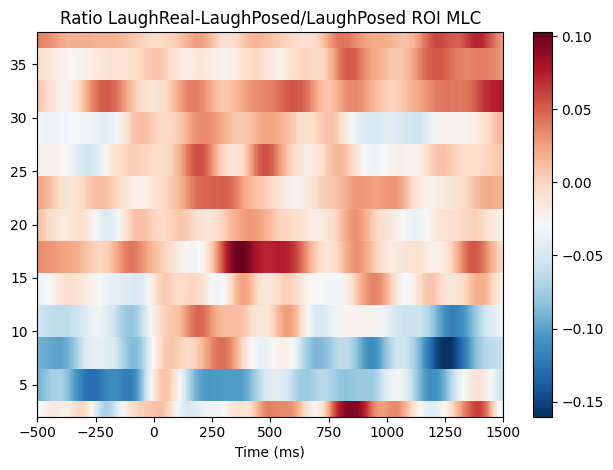

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  7.7min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  8.4min finished


Adding metadata with 7 columns
1st power (1979, 23, 13, 2401)
avg power  (23, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


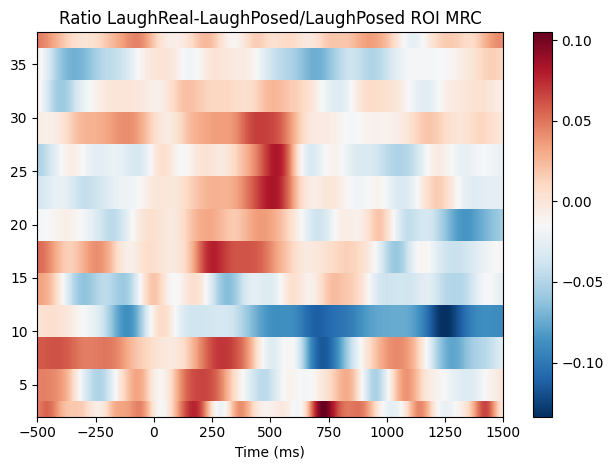

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 12.2min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 12.1min finished


Adding metadata with 7 columns
1st power (1979, 33, 13, 2401)
avg power  (33, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


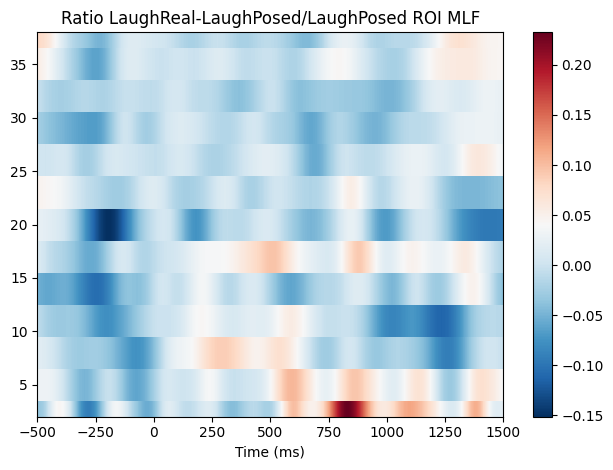

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 11.9min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 11.9min finished


Adding metadata with 7 columns
1st power (1979, 33, 13, 2401)
avg power  (33, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


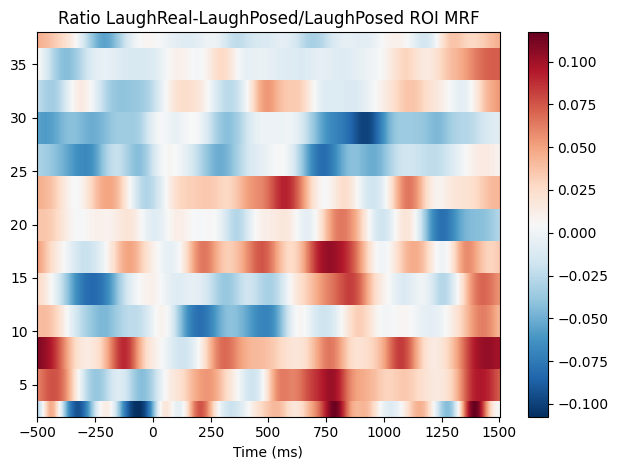

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices

No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  3.7min finished


Adding metadata with 7 columns


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  3.7min finished


Adding metadata with 7 columns
1st power (1979, 11, 13, 2401)
avg power  (11, 13, 2401)
avg power channel  (1, 13, 2401)
Applying baseline correction (mode: mean)


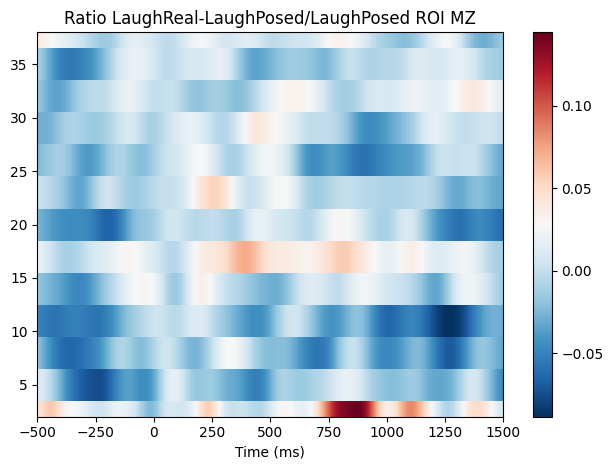

In [9]:
ROIS = ['MLO', 'MRO',
       'MLP', 'MRP',
       'MLT', 'MRT',
       'MLC', 'MRC',
       'MLF', 'MRF',
       'MZ']

task = 'LaughterActive'
cond1 = 'LaughReal'
cond2 = 'LaughPosed'
freqs = np.arange(2.0, 40.0, 3.0)
vmin, vmax = -0.6, 0.6 

filename = 'tf/sub-all_task-{}_run-all_cond-{}-{}_meas-time-ratio-frequency.pdf'.format(task, cond1, cond2)
pdf = PdfPages(FIG_PATH + filename)

for roi in ROIS : 
    
    all_epochs = []
    all_epochs_cond1 = []
    all_epochs_cond2 = []

    for subj in SUBJ_CLEAN :
        
        chan_selected = []

        print("processing -->", subj)

        _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
        epochs = mne.read_epochs(path_epochs, verbose=None)
        
        if subj == SUBJ_CLEAN[0]:
            head_info = epochs.info['dev_head_t']
        else:
            epochs.info['dev_head_t'] = head_info
            
        all_epochs_cond1.append(epochs[cond1])
        all_epochs_cond2.append(epochs[cond2])

    epochs_all_subj1 = mne.concatenate_epochs(all_epochs_cond1) # TODO SAVE THIS TO USE LOCAL
    epochs_all_subj2 = mne.concatenate_epochs(all_epochs_cond2) # TODO SAVE THIS TO USE LOCAL

    for chan in epochs.info['ch_names'] :
        if roi in chan : 
            chan_selected.append(chan) # Find channel of interest        
    
    n_cycles = freqs/2
    
    print(len(chan_selected))
   
    ######## COMPUTE TF ON EPOCHS
    ######## 1. compute morlet on every channel separately
    power_cond1 = tfr_morlet(
    epochs_all_subj1, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False, picks=chan_selected
    )
    
    power_cond2 = tfr_morlet(
    epochs_all_subj2, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False, picks=chan_selected
    )

    ######## 2. Average Trials
    print('1st power', power_cond1.data.shape)
    avgpower_cond1 = power_cond1.average()
    avgpower_cond2 = power_cond2.average()

    print('avg power ', avgpower_cond1.data.shape)

    ratio = (avgpower_cond1.data - avgpower_cond2.data)/avgpower_cond2.data

    ######## 3. Average Channel
    avgpower_chan = np.mean(ratio.data, axis=0)
    avgpower_chan = np.reshape(avgpower_chan, (1, avgpower_chan.shape[0], avgpower_chan.shape[1]))
    print('avg power channel ', avgpower_chan.shape)

    # Plot Average channel
    title_fig2 = "Ratio {}-{}/{} ROI {}".format(cond1, cond2, cond2, roi)
    # Baseline the output
    rescale(avgpower_chan, epochs.times, (0.0, 0.1), mode="mean", copy=False)
    fig, ax = plt.subplots()
    x, y = centers_to_edges(epochs.times * 1000, freqs)
    mesh = ax.pcolormesh(x, y, avgpower_chan[0], cmap="RdBu_r") #, vmin=vmin, vmax=vmax)
    ax.set_title(title_fig2)
    ax.set(ylim=freqs[[0, -1]], xlabel="Time (ms)")
    fig.colorbar(mesh)
    plt.tight_layout()

    plt.savefig(pdf, format='pdf') 
    plt.show()
    
pdf.close()